<a href="https://www.kaggle.com/code/afifaf20/courserasupervisedweek2lab4?scriptVersionId=197912222" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Goals
In this lab you will:
- explore feature engineering and polynomial regression which allows you to use the machinery of linear regression to fit very complicated, even very non-linear functions.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

ModuleNotFoundError: No module named 'lab_utils_multi'

<a name='FeatureEng'></a>
# Feature Engineering and Polynomial Regression Overview

Out of the box, linear regression provides a means of building models of the form:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$ 
What if your features/data are non-linear or are combinations of features? For example,  Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$,$\mathbf{b}$ in (1) will achieve a fit to a non-linear curve.


<a name='PolynomialFeatures'></a>
## Polynomial Features

Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic: $y = 1+x^2$

You're familiar with all the routines we're using. They are available in the lab_utils.py file for review. We'll use [`np.c_[..]`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) which is a NumPy routine to concatenate along the column boundary.

In [4]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

model_w,model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value");
plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  
plt.xlabel("X"); 
plt.ylabel("y");
plt.legend();
plt.show()

NameError: name 'run_gradient_descent_feng' is not defined

Well, as expected, not a great fit. What is needed is something like $y= w_0x_0^2 + b$, or a **polynomial feature**.
To accomplish this, you can modify the *input data* to *engineer* the needed features. If you swap the original data with a version that squares the $x$ value, then you can achieve $y= w_0x_0^2 + b$. Let's try it. Swap `X` for `X**2` below:

In [5]:
x = np.arange(0,20,1)
y= 1+ x**2

X=x**2

In [6]:
X = X.reshape(-1, 1)  #X should be a 2-D Matrix
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend();
plt.show()

NameError: name 'run_gradient_descent_feng' is not defined

In [8]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]  

In [9]:
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); 
plt.xlabel("x");
plt.ylabel("y"); 
plt.legend(); 
plt.show()

NameError: name 'run_gradient_descent_feng' is not defined

Note the value of $\mathbf{w}$, `[0.08 0.54 0.03]` and b is `0.0106`.This implies the model after fitting/training is:
$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.0106 $$
Gradient descent has emphasized the data that is the best fit to the $x^2$ data by increasing the $w_1$ term relative to the others.  If you were to run for a very long time, it would continue to reduce the impact of the other terms. 
>Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter

Let's review this idea:
- less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature is not useful in fitting the model to the data.
- above, after fitting, the weight associated with the $x^2$ feature is much larger than the weights for $x$ or $x^3$ as it is the most useful in fitting the data. 

In [10]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

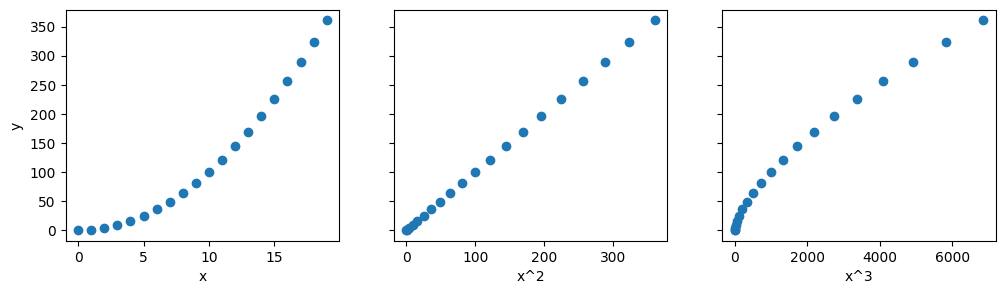

In [11]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [12]:
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]


NameError: name 'zscore_normalize_features' is not defined

In [13]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

NameError: name 'zscore_normalize_features' is not defined

In [14]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()


NameError: name 'zscore_normalize_features' is not defined


## Congratulations!
In this lab you:
- learned how linear regression can model complex, even highly non-linear functions using feature engineering
- recognized that it is important to apply feature scaling when doing feature engineering